In [1]:
# import all necessary functions
# the mock-0.3.1 dir contains testcase.py, testutils.py & mock.py

import pandas as pd
import numpy as np
import glob
import pyarrow as pa
import pyarrow.parquet as pq
import polars as pl
import seaborn as sns
import matplotlib.pyplot as plt
from preprocessing import feature_engineering as fe
import mplcyberpunk
import re
from sklearn.preprocessing import StandardScaler



pd.set_option('display.float_format', lambda x: '%.2f' % x)
pd.set_option('display.max_columns', 50)

In [2]:
# import the data set using polars since have large data sets
df_selected = pl.read_parquet("./data/2022_data_selected.parquet")

In [4]:
# lets us take a look at the type of data we have
df_selected.head(10)

date,serial_number,model,capacity_bytes,failure,smart_1_normalized,smart_1_raw,smart_3_normalized,smart_3_raw,smart_4_normalized,smart_4_raw,smart_5_normalized,smart_5_raw,smart_7_normalized,smart_7_raw,smart_9_normalized,smart_9_raw,smart_10_normalized,smart_10_raw,smart_12_normalized,smart_12_raw,smart_187_normalized,smart_187_raw,smart_188_normalized,smart_188_raw,smart_192_normalized,smart_192_raw,smart_193_normalized,smart_193_raw,smart_194_normalized,smart_194_raw,smart_197_normalized,smart_197_raw,smart_198_normalized,smart_198_raw,smart_199_normalized,smart_199_raw
str,str,str,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64
"""2022-03-11""","""ZLW18P9K""","""ST14000NM001G""",14000519643136,0,82,145176856,90,0,100,12,100,0,89,788618680,87,11590,100,0,100,12,100,0,100,0,100,2,99,2710,33,33,100,0,100,0,200,0
"""2022-03-11""","""ZLW0EGC7""","""ST12000NM001G""",12000138625024,0,82,151519352,99,0,100,1,100,0,83,178873441,84,14836,100,0,100,1,100,0,100,0,100,0,99,3909,48,48,100,0,100,0,200,0
"""2022-03-11""","""ZA1FLE1P""","""ST8000NM0055""",8001563222016,0,77,49979496,91,0,100,7,100,0,93,2115550504,84,14448,100,0,100,7,100,0,100,0,100,121,100,764,38,38,100,0,100,0,200,0
"""2022-03-11""","""ZA16NQJR""","""ST8000NM0055""",8001563222016,0,74,27873200,89,0,100,10,100,0,94,2634135447,52,42621,100,0,100,10,100,0,100,0,100,16,68,64822,34,34,100,0,100,0,200,0
"""2022-03-11""","""1050A084F97G""","""TOSHIBA MG07AC...",14000519643136,0,100,0,100,7770,100,3,100,0,100,0,81,7758,100,0,100,3,null,null,null,null,100,1,100,13,100,26,100,0,100,0,200,0
"""2022-03-11""","""PL1331LAHEYUGH...","""HGST HMS5C4040...",4000787030016,0,100,0,142,542,100,13,100,0,100,0,94,44730,100,0,100,13,null,null,null,null,100,395,100,395,253,23,100,0,100,0,200,0
"""2022-03-11""","""ZA130TTW""","""ST8000DM002""",8001563222016,0,82,146472136,94,0,100,3,100,0,82,151752248,46,47714,100,0,100,3,100,0,100,0,100,0,73,54154,30,30,100,0,100,0,200,0
"""2022-03-11""","""7040A07GF97G""","""TOSHIBA MG07AC...",14000519643136,0,100,0,100,7883,100,5,100,0,100,0,75,10272,100,0,100,5,null,null,null,null,100,2,100,11,100,23,100,0,100,0,200,0
"""2022-03-11""","""1070A04CF97G""","""TOSHIBA MG07AC...",14000519643136,0,100,0,100,7853,100,4,100,0,100,0,67,13365,100,0,100,4,null,null,null,null,100,3,100,15,100,21,100,0,100,0,200,0


In [6]:
# let us take a look at the number of observations/rows/entries/samples and number of columns
df_selected.shape

(80357762, 37)

In [7]:
#check for the null counts in each column
df_selected.null_count()

date,serial_number,model,capacity_bytes,failure,smart_1_normalized,smart_1_raw,smart_3_normalized,smart_3_raw,smart_4_normalized,smart_4_raw,smart_5_normalized,smart_5_raw,smart_7_normalized,smart_7_raw,smart_9_normalized,smart_9_raw,smart_10_normalized,smart_10_raw,smart_12_normalized,smart_12_raw,smart_187_normalized,smart_187_raw,smart_188_normalized,smart_188_raw,smart_192_normalized,smart_192_raw,smart_193_normalized,smart_193_raw,smart_194_normalized,smart_194_raw,smart_197_normalized,smart_197_raw,smart_198_normalized,smart_198_raw,smart_199_normalized,smart_199_raw
u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32
0,0,0,0,0,161211,161211,954776,954776,954776,954776,797671,797671,954776,954776,142205,142205,954776,954776,142205,142205,40981577,40981577,41087116,41087116,299310,299310,1102793,1102793,142205,142205,2394949,2394949,816677,816677,797671,797671


In [9]:
def get_nan_count_percent(df, divisor=None):
    """Calculates the number of nan values per column,
        both as an absolute amount and as a percentage of some pre-defined "total" amount
        
        WARNING: Return value is of the same type (pd.DataFrame or dask.dataframe) as the
        input. It is up to the caller to handle this accordingly.
    
    Arguments:
        df {polars.DataFrame/dask.dataframe} -- dataframe whose nan count to generate
    
    Keyword Arguments:
        divisor {int/float} -- the "total" amount for calculating percentage. 
                                If value in count column is n, value in percent column
                                will be n/divisor.
                                If not provided, number of rows is used by default
                                (default: {None})
    
    Returns:
        ret_df {pandas.DataFrame/dask.dataframe} -- dataframe with counts and percentages
                                                    of nans in each column of input df.
                                                    Column name is the index, "count" and
                                                    "percent" are the two columns.
    """
    # if total count is not provided, use the number of rows
    if divisor is None:
        # NOTE: len must be used, not shape because in case of dask dataframe
        # shape returns a delayed computation, not an actual value. but
        # len returns an actual value
        divisor = len(df)

    # get count and convert series to dataframe
    ret_df = df.null_count().transpose()
    ret_df = ret_df.with_column(pl.lit(ret_df["column_0"] / divisor).alias('percent'))

    # add percent column
    #ret_df["percent"] = ret_df["column_0"] / divisor

    return ret_df

In [10]:
#check the percentage by null counts
get_nan_count_percent(df_selected).sort(by='percent')

/var/folders/hv/9tvdbwls3db6bpzxv58y5w_80000gn/T/ipykernel_87964/3159103596.py:33: DeprecationWarning: `DataFrame.with_column` has been renamed; this redirect is temporary, please use `.with_columns` instead
  ret_df = ret_df.with_column(pl.lit(ret_df["column_0"] / divisor).alias('percent'))


column_0,percent
u32,f64
0,0.0
0,0.0
0,0.0
0,0.0
0,0.0
142205,0.00177
142205,0.00177
142205,0.00177
142205,0.00177


In [11]:
#check for the failure counts
df_selected['failure'].value_counts()

failure,counts
i64,u32
0,80354604
1,3158


In [23]:
#let us filter only the failures
df_failure = df_selected.filter(pl.col("failure") == 1)

In [20]:
# let us have a look at the total counts for the serial number
df_selected['serial_number'].value_counts()

serial_number,counts
str,u32
"""40N0A0ASF97G""",364
"""ZL2AJ0BG""",364
"""ZA12QFJ2""",364
"""PL2331LAGSSLEJ...",364
"""11K0A04HF97G""",364
"""PL1331LAHD323H...",365
"""ZL2LTDW5""",198
"""Z302T6NX""",364
"""5130A006F97G""",365


In [12]:
#let us explore a random serial number to see if there is a pattern
# taking serial number: "ZJV3BYAY" and sorting it by date
df_sorted = (df_selected.filter(pl.col("serial_number") == "ZJV3BYAY")).sort(by='date')

In [18]:
#let us format the date of df_sorted before we can visualize it
df_sorted= df_sorted.with_columns(pl.col(['date']).str.strptime(pl.Date, fmt='%Y-%m-%d'), strict=False)

In [19]:
#Take a look at the sorted dataFrame
df_sorted.head(10)

date,serial_number,model,capacity_bytes,failure,smart_1_normalized,smart_1_raw,smart_3_normalized,smart_3_raw,smart_4_normalized,smart_4_raw,smart_5_normalized,smart_5_raw,smart_7_normalized,smart_7_raw,smart_9_normalized,smart_9_raw,smart_10_normalized,smart_10_raw,smart_12_normalized,smart_12_raw,smart_187_normalized,smart_187_raw,smart_188_normalized,smart_188_raw,smart_192_normalized,smart_192_raw,smart_193_normalized,smart_193_raw,smart_194_normalized,smart_194_raw,smart_197_normalized,smart_197_raw,smart_198_normalized,smart_198_raw,smart_199_normalized,smart_199_raw,strict
date,str,str,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,bool
2022-01-01,"""ZJV3BYAY""","""ST12000NM0007""",12000138625024,0,78,60399200,89,0,100,19,100,2832,89,814544278,78,20025,100,0,100,19,97,3,100,0,100,266,100,1521,33,33,100,0,100,0,200,0,false
2022-01-02,"""ZJV3BYAY""","""ST12000NM0007""",12000138625024,0,83,198487720,89,0,100,19,100,2832,89,817290353,78,20040,100,0,100,19,97,3,100,0,100,266,100,1522,32,32,100,0,100,0,200,0,false
2022-01-03,"""ZJV3BYAY""","""ST12000NM0007""",12000138625024,0,75,31407792,89,0,100,19,100,2832,89,821810398,78,20072,100,0,100,19,97,3,100,0,100,266,100,1523,32,32,100,0,100,0,200,0,false
2022-01-04,"""ZJV3BYAY""","""ST12000NM0007""",12000138625024,0,73,20187800,89,0,100,19,100,2848,89,823615483,78,20087,100,0,100,19,96,4,100,0,100,266,100,1524,34,34,100,0,100,0,200,0,false
2022-01-05,"""ZJV3BYAY""","""ST12000NM0007""",12000138625024,0,81,129916256,89,0,100,19,100,2920,89,826413578,78,20119,100,0,100,19,96,4,100,0,100,267,100,1525,32,32,100,0,100,0,200,0,false
2022-01-06,"""ZJV3BYAY""","""ST12000NM0007""",12000138625024,0,69,7366272,89,0,100,19,100,2960,89,827704847,78,20134,100,0,100,19,96,4,100,0,100,267,100,1526,31,31,100,0,100,0,200,0,false
2022-01-07,"""ZJV3BYAY""","""ST12000NM0007""",12000138625024,0,83,218565896,89,0,100,19,100,3144,89,831543630,77,20166,100,0,100,19,96,4,100,0,100,267,100,1527,34,34,100,0,100,0,200,0,false
2022-01-08,"""ZJV3BYAY""","""ST12000NM0007""",12000138625024,0,81,137463872,89,0,100,19,100,3144,89,834212624,77,20182,100,0,100,19,96,4,100,0,100,267,100,1528,33,33,100,0,100,0,200,0,false
2022-01-09,"""ZJV3BYAY""","""ST12000NM0007""",12000138625024,0,83,223506384,89,0,100,19,100,3248,89,838731794,77,20213,100,0,100,19,96,4,100,0,100,267,100,1529,32,32,100,0,100,0,200,0,false


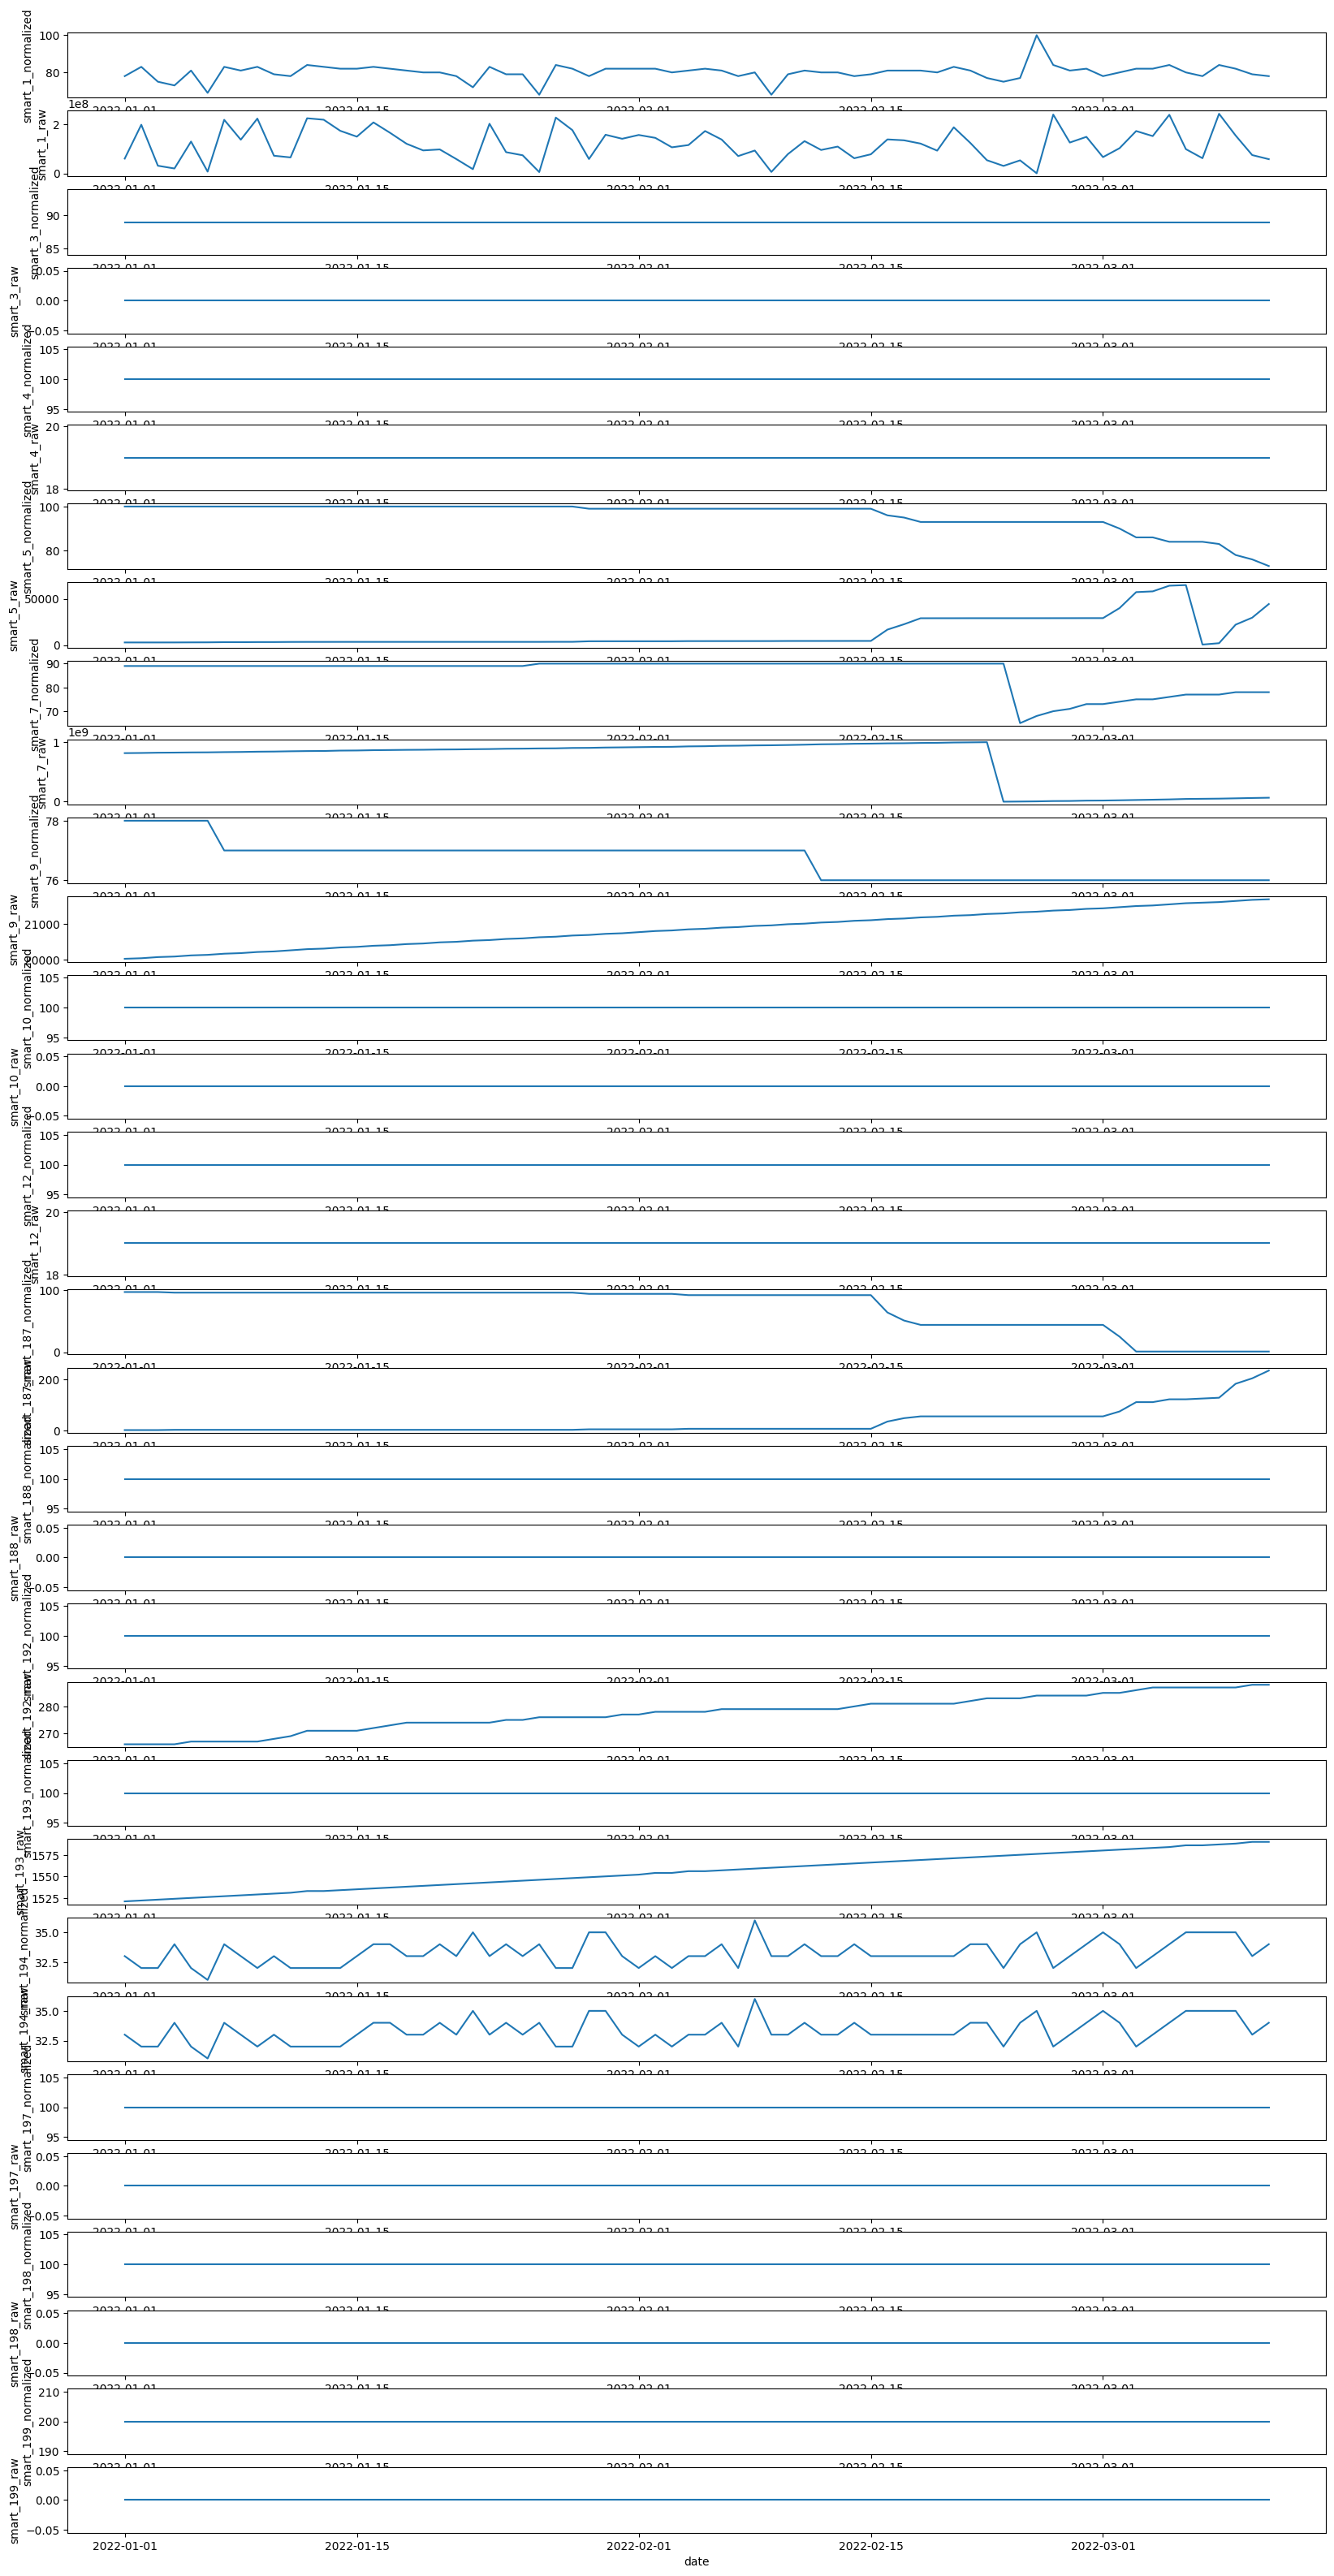

In [20]:
#let us visualize the sorted dataFrame
fig, ax = plt.subplots(32, figsize=(20,40))
for i in range(32):
    graph1 = sns.lineplot(data=df_sorted, x='date', y=df_sorted.columns[i+5], ax=ax[i])

In [21]:
# check for the model counts in the chosen datasets
df_selected_modelcounts = df_selected['model'].value_counts()
df_selected_modelcounts

model,counts
str,u32
"""WDC WDS250G2B...",162
"""ST16000NM001G""",6057376
"""HGST HDS5C4040...",9463
"""TOSHIBA MQ01AB...",100295
"""WDC WUH721816A...",1309272
"""ST8000NM0055""",5230097
"""ST10000NM0086""",430092
"""Seagate IronWo...",4120
"""TOSHIBA MG08AC...",2167676


In [29]:
#check for the model counts in the filtered failed datasets and sort them in descending order
df_failure_modelcounts = df_failure['model'].value_counts().sort(by="counts", descending=True)


In [30]:
#convert the failure-model-counts DataFrame to pandas so that it can be visualized  
df_failure_modelcounts =df_failure_modelcounts.to_pandas()

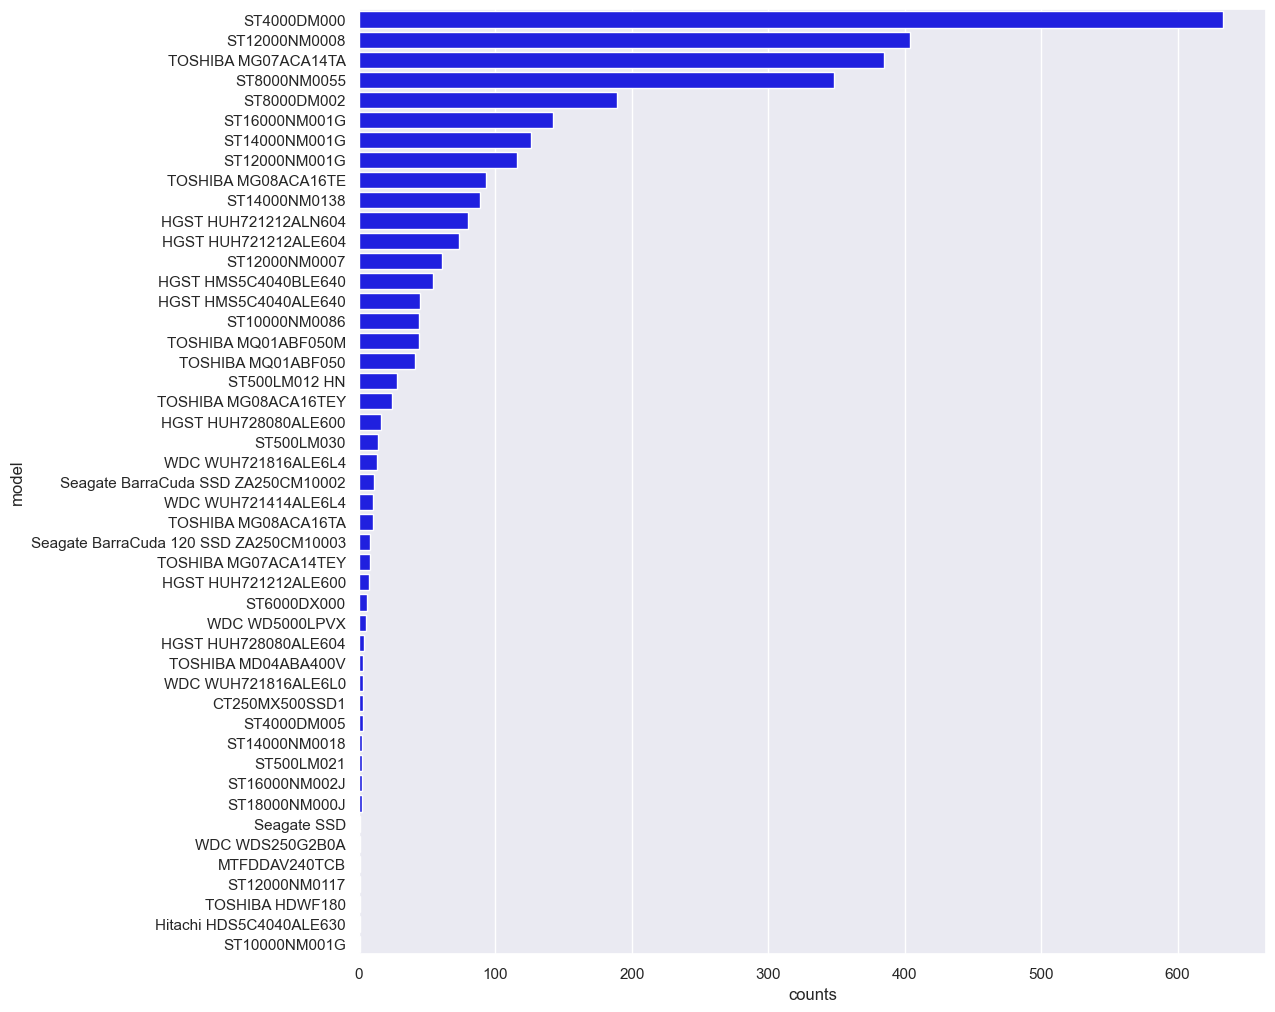

In [36]:
#Plot to Visualize the DataFrame 
sns.barplot(data=df_failure_modelcounts, x="counts" ,y='model',color="blue")
sns.set(rc={'figure.figsize':(11.7,12.27)})
plt.yticks();

### As seen above, Model ST4000DM000 is the highest failed hard drive. Then we will explore this model

In [5]:
#Now we explore the selected model "ST4000DM000"
df_st4000 = df_selected.filter((pl.col("model") == "ST4000DM000"))

In [6]:
#Take a look at the shape
df_st4000.shape

(6699353, 37)

In [7]:
#create dictionary with the selected model serial numbers and the corresponding date at which the hard drive failed. The written function is in the feature.engineering pythonfile
st400_dict = fe.create_faildate_dict(df_st4000)

In [8]:
#Map the date at which the Hard drive will fail to each Data Point with the corresponding serial number and the written function is in feature.engineering pythonfiles
df_st4000 = fe.create_faildate(df_st4000, st400_dict)

### We set 2 weeks window and classified the last 2 weeks before failure as failing hard drives and the rest no failure 

In [9]:
#create a new column with classification of 1 if failure happens in the next 14 days or 0 if no failure happens in the next 14  days. The function is in the feature.engineering pythonfiles
df_st4000 = fe.create_target_classification(df_st4000)

In [11]:
#We will save the parquet file for later use
df_st4000.write_parquet("./data/2022_data_ST4000DM000.parquet")

#### we will create failure rate per hard drive model to see the number of entries per failure rate for each hard drive

In [12]:
# first let us get the unique model and their serial number
df_unique_model = df_selected.select(["serial_number", "model"]).unique()

In [13]:
# We will groupby the model and aggregate by the serial number
df_unique_grouped = df_unique_model.groupby("model").agg(pl.col("serial_number").count())

In [14]:
#let us look at the dataFrame
df_unique_grouped

model,serial_number
str,u32
"""ST8000DM005""",25
"""TOSHIBA HDWF18...",21
"""WDC WUH721414A...",8420
"""ST12000NM0008""",20236
"""DELLBOSS VD""",411
"""Seagate BarraC...",3
"""HGST HMS5C4040...",12784
"""HGST HMS5C4040...",1
"""HGST HUH721212...",2613


In [44]:
#let us sort the DataFrame in descending order and convert it into pandas
df_unique_sorted = df_unique_grouped.sort(by='serial_number', descending=True)
df_unique_sorted = df_unique_sorted.to_pandas()

In [45]:
#let us concate failure-model-counts DataFrame and unique model and their serial number dataFrame
df_fail_per_model = pd.concat([df_failure_modelcounts, df_unique_sorted], keys="model", axis=1)

In [47]:
#see the shape
df_fail_per_model.shape

(75, 4)

In [48]:
#let us join failure-model-counts DataFrame and unique model and their serial number dataFrame #
df_fail_per_model = df_unique_sorted.join(df_failure_modelcounts.set_index("model"), on = "model")

In [50]:
#let us calculate the percentage for the hard drives
df_fail_per_model["percentage"] = (100/ df_fail_per_model["serial_number"])* df_fail_per_model["counts"]

In [51]:
#failure percentage per hard drive model sorted in ascending order
df_fail_per_model = df_fail_per_model.sort_values("percentage", ascending=False)

#### Create column with manufacturer 

In [62]:
#let us write a dictionary for the manufacturers
manu_dict = {"Toshiba" : ["TOSHIBA"], 
            "Seagate" : ["ST", "Seagate"],
            "HGST" : ["HGST"],
            "Western Digital" : ["WDC"],
            "Hitachi" : ["Hitachi"],
            "Micron":["MTFDD"],
            "Crucial":["CT"]}

In [68]:
#Let us define the functions for regular expressions for manufactures
def re_function(str_var):
    for key, values in manu_dict.items():
        for value in values:
            if re.match(value, str_var):
                return key

In [83]:
# we map the manufactures into the df_fail_per_model dataFrame
df_fail_per_model["manufacturer"] = df_fail_per_model["model"].apply(lambda x: re_function(x))

In [84]:
#let us take a look at the dataFrame
df_fail_per_model

,model,serial_number,counts,percentage,manufacturer
34,TOSHIBA MQ01ABF050M,298,44.00,14.77,Toshiba
35,TOSHIBA MQ01ABF050,281,41.00,14.59,Toshiba
63,Hitachi HDS5C4040ALE630,7,1.00,14.29,Hitachi
61,ST12000NM0117,10,1.00,10.00,Seagate
49,ST4000DM005,38,3.00,7.89,Seagate
...,...,...,...,...,...
70,Seagate FireCuda 120 SSD ZA500GM10001,2,NaN,NaN,Seagate
71,HGST HMS5C4040BLE641,1,NaN,NaN,HGST
72,ST1000LM024 HN,1,NaN,NaN,Seagate
73,ST6000DM004,1,NaN,NaN,Seagate


: 

In [80]:
#let us define the colors for the data visualization
colors = [
    '#ff5349', #red
    '#6eedda',  # teal/cyan
    #'#CA2C92',  # pink
    '#FFFF00',  # yellow
    '#00ff41', # matrix green
    "#584efd" # lilac
]
plt.style.use("cyberpunk")
plt.style.use('dark_background')

In [81]:
#We would look out for serial numbers greater than or equal to 100
label_series = df_fail_per_model[df_fail_per_model["serial_number"]>= 100]["serial_number"]
label_list = []
for i in label_series:
    label_list.append(f" {i}") 

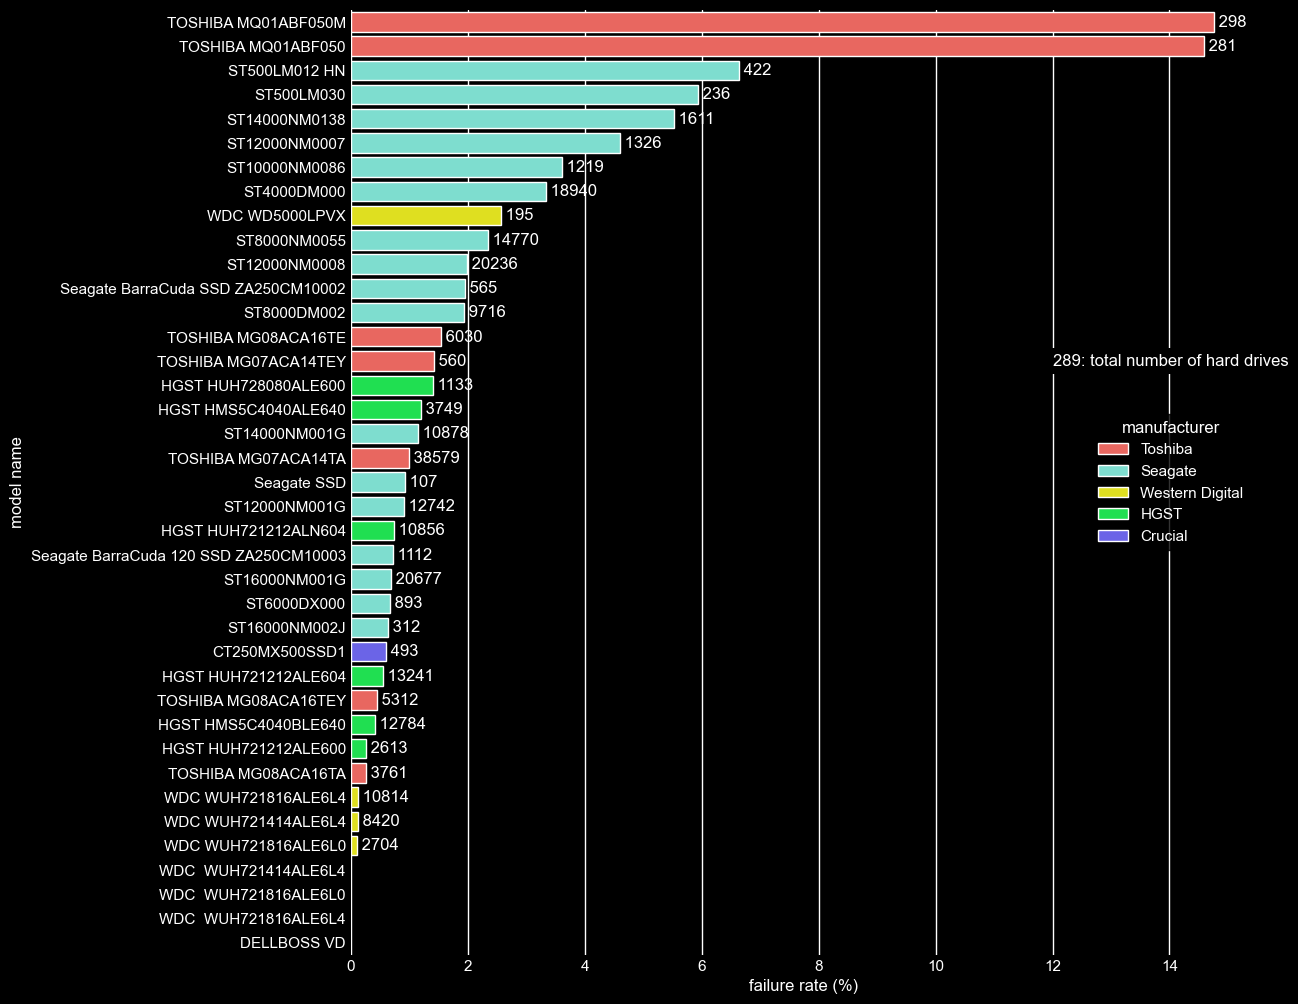

In [82]:
#we would like to visualize the df_fail_per_model dataFrame
ax = sns.barplot(data=df_fail_per_model[df_fail_per_model["serial_number"]>= 100], x="percentage", y="model", hue="manufacturer", dodge=False,palette= colors)
#add total numbers of hard drives at labels
for container in ax.containers:
    ax.bar_label(container=container, labels = label_list)
#create legend object
l = ax.legend(frameon=1, facecolor= "black", loc="center right", title="manufacturer")
l.get_frame().set_edgecolor('black')
#create custom text box with label explanation
t = ax.text( 12, 14.2, "289: total number of hard drives", )
ax.set_ylabel("model name")
ax.set_xlabel("failure rate (%)")
t.set_bbox({"facecolor":"black",  "linewidth":0})

In [15]:
#Let us filter the selected model for "Time_till_failure"greater or equal to one day
df_st4000 = df_st4000.filter(pl.col("Time_till_failure") >= pl.duration(days=1))

In [16]:
# convert the DataFrame to Pandas
df_st4000 = df_st4000.to_pandas()

### We would like to check the specific selected S.M.A.R.T columns used by BACKBLAZE To test run our model 

In [17]:
# We would groupby the mean of the selected raw S.M.A.R.T
df_mean = df_st4000.groupby(['Time_till_failure'])['smart_5_raw', 'smart_187_raw', 'smart_188_raw', 'smart_197_raw', 'smart_198_raw', 'smart_194_raw'].mean()

/var/folders/hv/9tvdbwls3db6bpzxv58y5w_80000gn/T/ipykernel_90920/2231965951.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_mean = df_st4000.groupby(['Time_till_failure'])['smart_5_raw', 'smart_187_raw', 'smart_188_raw', 'smart_197_raw', 'smart_198_raw', 'smart_194_raw'].mean()


In [19]:
#let us take a look at the groupby mean DataFrame
df_mean.head()

,smart_5_raw,smart_187_raw,smart_188_raw,smart_197_raw,smart_198_raw,smart_194_raw
Time_till_failure,,,,,,
1 days,1194.71,64.04,0.39,334.08,334.08,25.18
2 days,1045.05,61.52,0.35,272.61,272.61,25.19
3 days,992.33,58.87,0.32,248.87,248.87,25.24
4 days,1003.86,56.25,0.27,209.87,209.87,25.30
5 days,887.61,56.08,0.27,193.93,193.93,25.27


In [20]:
# We would reset the index of the DataFrame
df_mean =df_mean.reset_index()


In [22]:
#Format 'Time_till_failure'
df_mean['Time_till_failure'] = df_mean['Time_till_failure'].dt.days
df_mean.head()

,Time_till_failure,smart_5_raw,smart_187_raw,smart_188_raw,smart_197_raw,smart_198_raw,smart_194_raw
0,1,1194.71,64.04,0.39,334.08,334.08,25.18
1,2,1045.05,61.52,0.35,272.61,272.61,25.19
2,3,992.33,58.87,0.32,248.87,248.87,25.24
3,4,1003.86,56.25,0.27,209.87,209.87,25.30
4,5,887.61,56.08,0.27,193.93,193.93,25.27


In [25]:
#drop the 'Time_till_failure' inorder to plot it on the X-Axis
df_mean_smart = df_mean.drop(['Time_till_failure'], axis=1)
df_mean_time = df_mean['Time_till_failure']

In [26]:
df_mean_smart.head()

,smart_5_raw,smart_187_raw,smart_188_raw,smart_197_raw,smart_198_raw,smart_194_raw
0,1194.71,64.04,0.39,334.08,334.08,25.18
1,1045.05,61.52,0.35,272.61,272.61,25.19
2,992.33,58.87,0.32,248.87,248.87,25.24
3,1003.86,56.25,0.27,209.87,209.87,25.30
4,887.61,56.08,0.27,193.93,193.93,25.27


In [27]:
#scale the df_mean_smart and put it into DataFrame
scaler = StandardScaler()
df_mean_smart = scaler.fit_transform(df_mean_smart)
df_mean_smart = pd.DataFrame(df_mean_smart)

In [28]:
#concate the dataframes
df_mean = pd.concat([df_mean_time,df_mean_smart], axis=1)

In [29]:
#let us take a look at the DataFrame
df_mean.head()

,Time_till_failure,0,1,2,3,4,5
0,1,5.29,3.87,6.10,8.35,8.35,-0.93
1,2,4.41,3.64,5.42,6.70,6.70,-0.90
2,3,4.09,3.40,4.93,6.06,6.06,-0.82
3,4,4.16,3.17,3.94,5.01,5.01,-0.71
4,5,3.47,3.15,3.98,4.59,4.59,-0.77


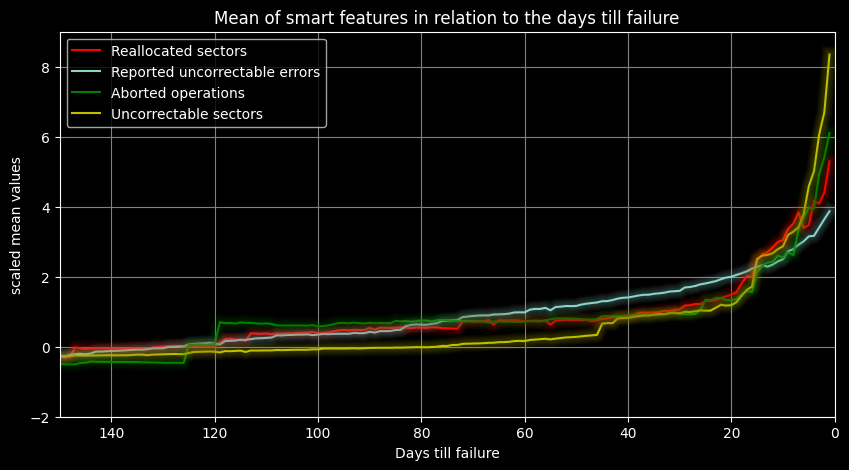

In [30]:
#Let us visualize the dataFrame
plt.style.use('dark_background')
fig, ax = plt.subplots(figsize = (10,5))
sns.lineplot(x=df_mean['Time_till_failure'],y=df_mean[0], ax=ax, color='r', label='Reallocated sectors')
sns.lineplot(data=df_mean,x='Time_till_failure',y=1, ax=ax, label='Reported uncorrectable errors')
sns.lineplot(data=df_mean,x='Time_till_failure',y=2, ax=ax, color='g', label='Aborted operations')
sns.lineplot(data=df_mean,x='Time_till_failure',y=4, ax=ax, color='y', label='Uncorrectable sectors')
ax.set_xlim(0,150)
ax.set_ylim(-2,9)
ax.invert_xaxis()
plt.xlabel('Days till failure')
plt.ylabel('scaled mean values')
mplcyberpunk.make_lines_glow()
plt.title('Mean of smart features in relation to the days till failure')
#create legend object
#l = ax.legend(frameon=1, facecolor= "black", loc="center right", title="manufacturer")
#l.get_frame().set_edgecolor('black')
#ax.grid(False)
ax.grid(color='grey')
plt.rc('axes', axisbelow=False)
plt.show()